Analysis Task
- Exploratory Data Analysis:

Which movies have maximum views/ratings?
What is the average rating for each movie? Define the top 5 movies with the maximum ratings.
Define the top 5 movies with the least audience.
- Recommendation Model: Some of the movies hadn’t been watched and therefore, are not rated by the users. Netflix would like to take this as an opportunity and build a machine learning recommendation algorithm which provides the ratings for each of the users.

Divide the data into training and test data
Build a recommendation model on training data
Make predictions on the test data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [4]:
import os
os.chdir(r'C:\Users\ashok\Downloads\PG\PGP Data Science\Machine Learning\Download\Recommendation for Amazon')

In [5]:
Amazon=pd.read_csv('Amazon.csv')

In [6]:
Amazon.shape

(4848, 207)

In [7]:
Amazon.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Amazon.fillna(0, inplace=True)

In [9]:
Amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Columns: 207 entries, user_id to Movie206
dtypes: float64(206), object(1)
memory usage: 7.7+ MB


In [11]:
# movie has maximum veiws and ratings
b=[]
for i in Amazon.columns:
    if i != 'user_id':
        a=(Amazon[i] !=0).sum()
        b.append(a)
np.transpose(b)
Movierating_df =pd.DataFrame(b, index=Amazon.columns[1:])

In [12]:
sorted_movies = Movierating_df.sort_values(by=0, ascending=False)
sorted_movies.head(10).index

Index(['Movie127', 'Movie140', 'Movie16', 'Movie103', 'Movie29', 'Movie91',
       'Movie92', 'Movie89', 'Movie158', 'Movie108'],
      dtype='object')

<ipython-input-14-089970057d8f>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sorted_movies.head(10), labels=sorted_movies.head(10).index)


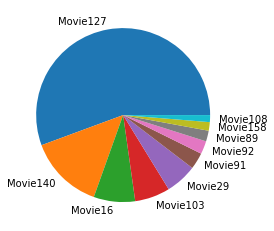

In [14]:
plt.pie(sorted_movies.head(10), labels=sorted_movies.head(10).index)
plt.show()

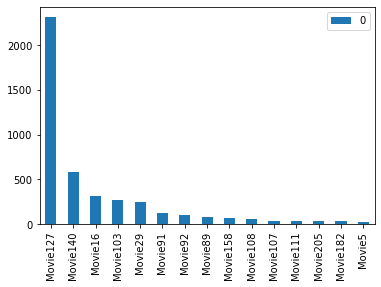

In [15]:
sorted_movies.head(15).plot(kind='bar')
plt.show()

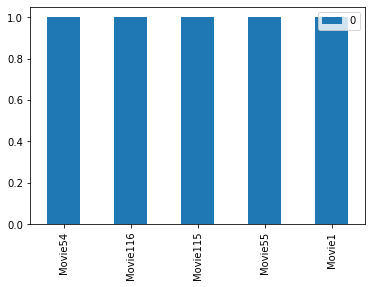

In [16]:
# movies with least audience
sorted_movies.tail(5).plot(kind='bar')
plt.show()

In [18]:
#average rating 
df=Amazon.drop('user_id', axis=1)

In [19]:
Avg_df = pd.DataFrame(df.mean(), index=df.columns)

In [20]:
sorted_avg = Avg_df.sort_values(by=0,ascending=False)

In [21]:
sorted_avg.head(10)

,0
Movie127,1.961840
Movie140,0.576320
Movie16,0.298267
Movie103,0.255982
Movie29,0.240924
Movie91,0.120875
Movie92,0.099422
Movie89,0.078383
Movie158,0.065594
Movie108,0.051980


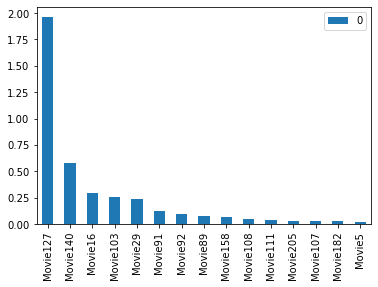

In [22]:
sorted_avg.head(15).plot(kind='bar')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test= train_test_split(Amazon, random_state=0, test_size=.25)

In [26]:
#converting dataframe into matrx
matrix = df.to_numpy()

In [27]:
matrix.shape

(4848, 206)

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
user_similarity = cosine_similarity(matrix)

In [29]:
user_similarity.shape

(4848, 4848)

In [30]:
moive_similarity = cosine_similarity(matrix.T)

In [31]:
moive_similarity.shape

(206, 206)

In [32]:
movies_similarity= pd.DataFrame(moive_similarity, index=df.columns, columns=df.columns)

In [33]:
movies_similarity.head()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
Movie1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
user_similarity=pd.DataFrame(user_similarity, index=Amazon.user_id, columns=Amazon.user_id)

In [36]:
user_similarity.head()

user_id,A3R5OBKS7OM2IR,AH3QC2PC1VTGP,A3LKP6WPMP9UKX,AVIY68KEPQ5ZD,A1CV1WROP5KTTW,AP57WZ2X4G0AA,A3NMBJ2LCRCATT,A5Y15SAOMX6XA,A3P671HJ32TCSF,A3VCKTRD24BG7K,...,A31KDG42LDKA68,A1ZW2GF8QLTG62,A15W9FRLBUXJNS,AQ4JA4RFC5QHI,A1HY5DOJCVB8MG,A1IMQ9WMFYKWH5,A1KLIKPUF5E88I,A5HG6WFZLO10D,A3UU690TWXCG1X,AI4J762YI6S06
user_id,,,,,,,,,,,,,,,,,,,,,
A3R5OBKS7OM2IR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AH3QC2PC1VTGP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3LKP6WPMP9UKX,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVIY68KEPQ5ZD,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
user_similarity['AH3QC2PC1VTGP'].value_counts()

0.0    4847
1.0       1
Name: AH3QC2PC1VTGP, dtype: int64

In [38]:
user_similarity['AP57WZ2X4G0AA'].value_counts()

0.0    4819
1.0      29
Name: AP57WZ2X4G0AA, dtype: int64

AP57WZ2X4G0AA has 100% similarity with 29 users.